## **Exploratory Data Analysis (Emplyee_dataset)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
employee_data = pd.read_csv("Employee.csv")
employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
employee_data.info

<bound method DataFrame.info of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes

In [8]:
employee_data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [12]:
#sns.pairplot(employee_data)

In [11]:
# What each categorical feature value are
def uniqueValue(data):
    for column in data.select_dtypes('object'):
        print(column, ':', data[column].unique())
uniqueValue(employee_data)

Education : ['Bachelors' 'Masters' 'PHD']
City : ['Bangalore' 'Pune' 'New Delhi']
Gender : ['Male' 'Female']
EverBenched : ['No' 'Yes']


In [14]:
employee_data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

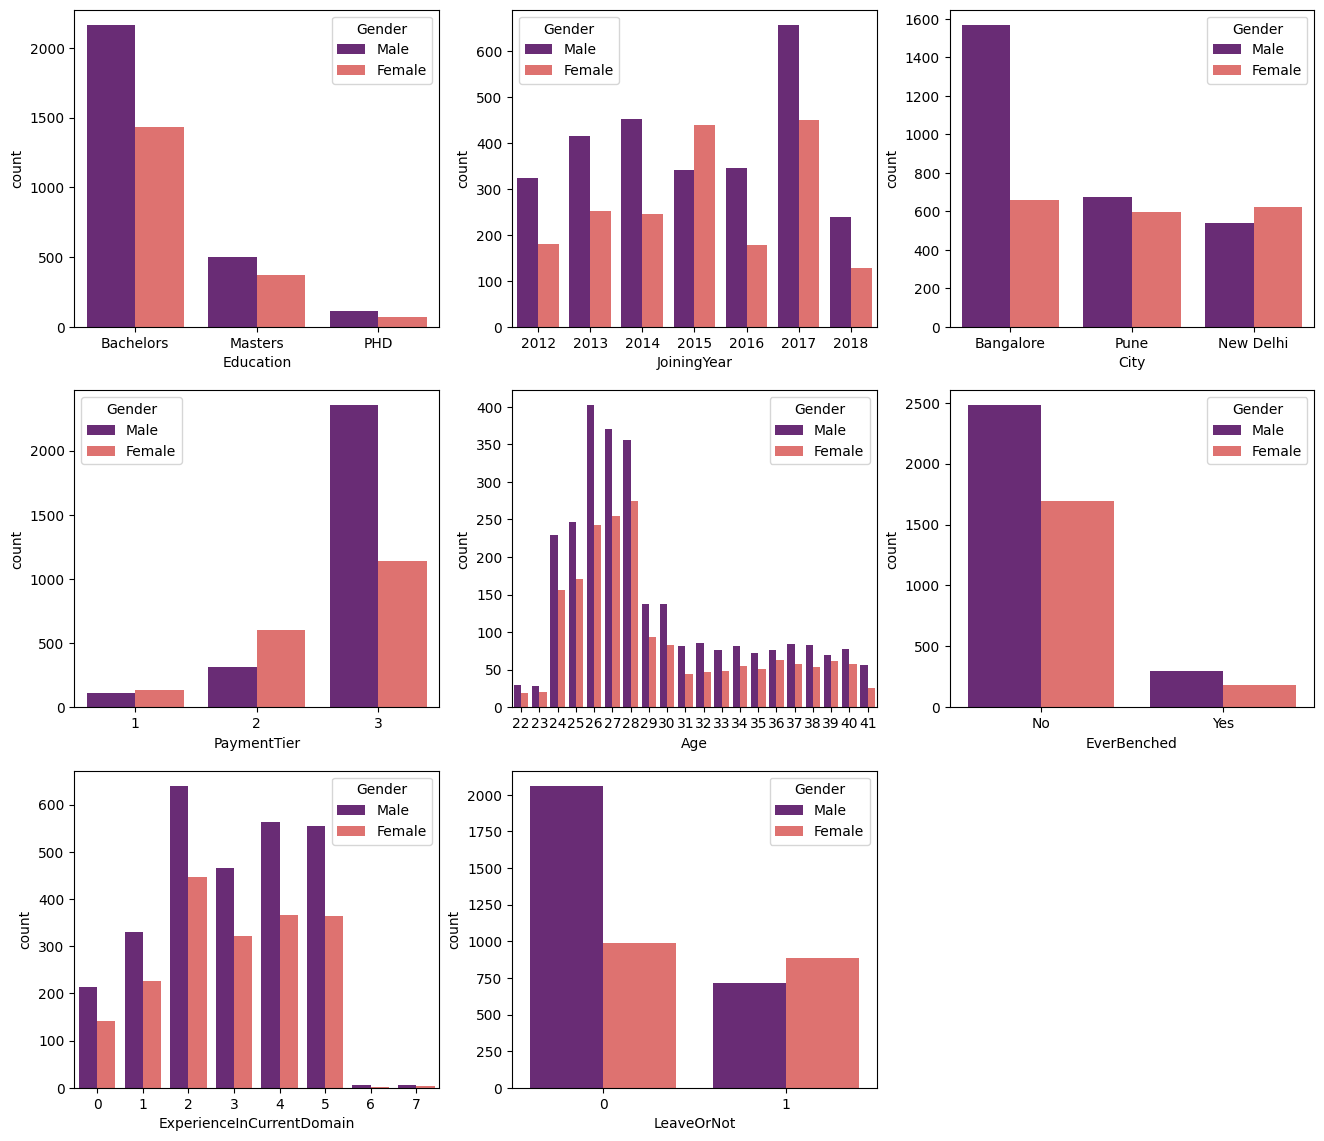

In [19]:
#the distribution of each feature with each gender
columns = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']
def seabornHist(data):
    plt.figure(figsize=(16,14))
    for i in range(len(columns)):
        plt.subplot(3,3,i+1)
        sns.countplot(x=data[columns[i]],hue = data['Gender'],palette = 'magma')
seabornHist(employee_data)

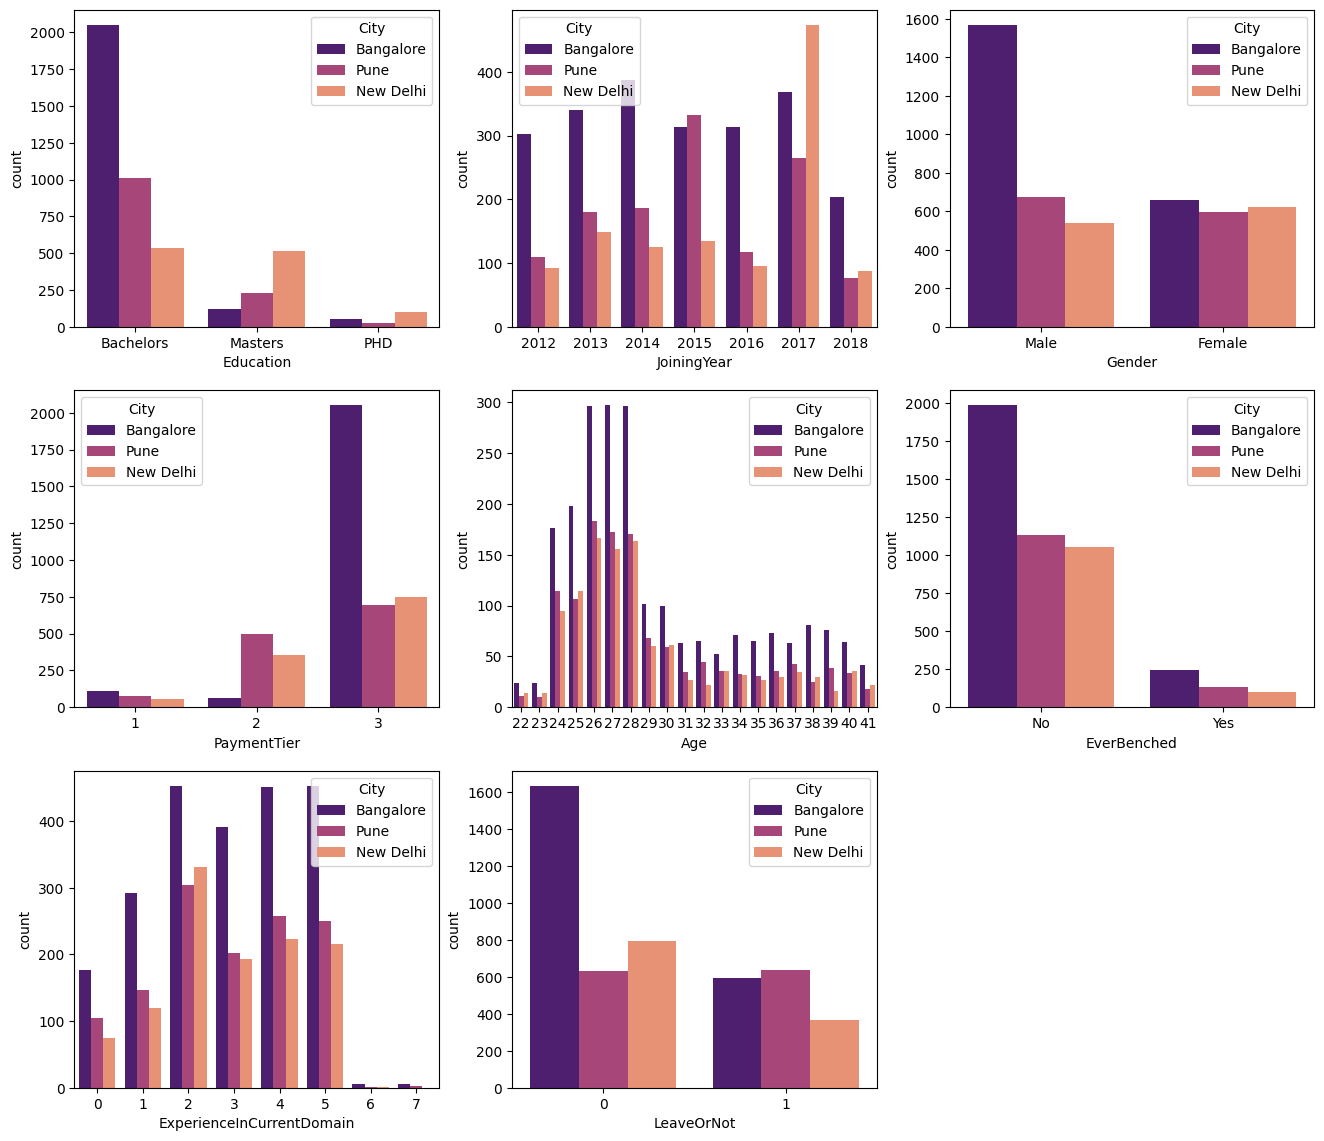

In [22]:
#the distribution of each feature with each gender
columns = ['Education', 'JoiningYear', 'Gender', 'PaymentTier', 'Age',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']
def seabornHist(data):
    plt.figure(figsize=(16,14))
    for i in range(len(columns)):
        plt.subplot(3,3,i+1)
        sns.countplot(x=data[columns[i]],hue = data['City'],palette = 'magma')
seabornHist(employee_data)

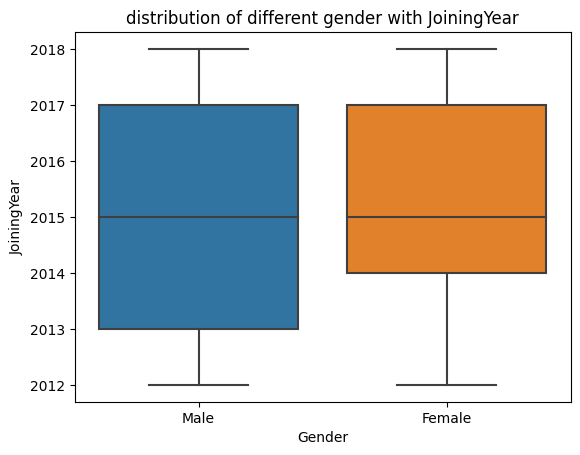

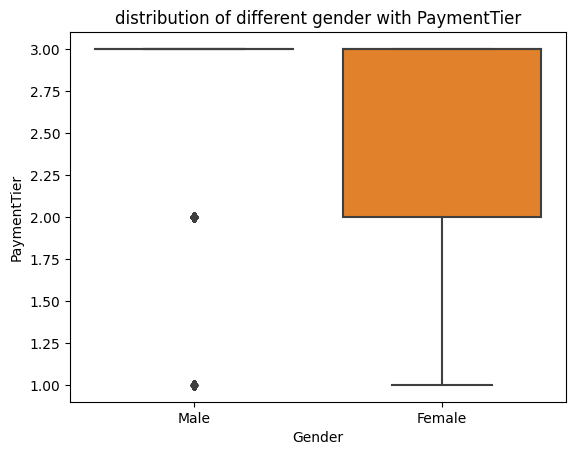

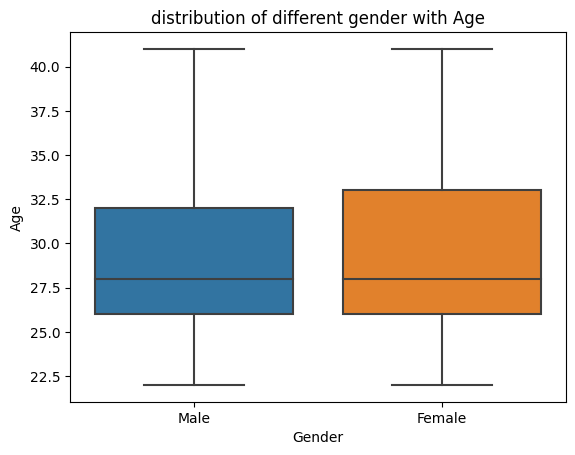

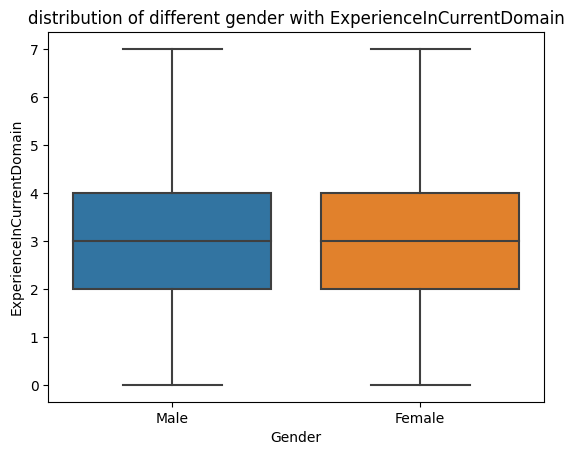

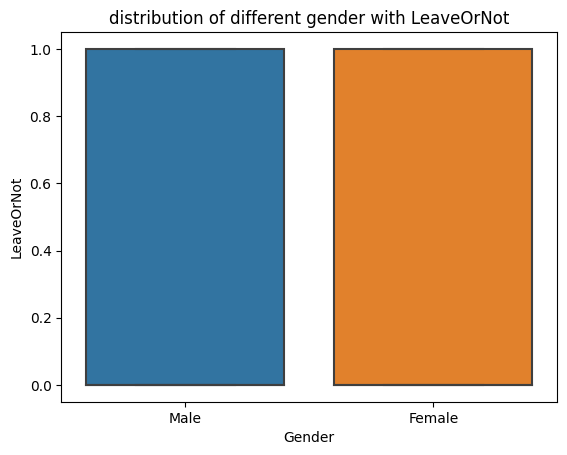

In [21]:
def numVariableVsTarget (data):
    for column in data.select_dtypes('int64'):
        sns.boxplot(data=data,x='Gender',y=column)
        plt.title(f'distribution of different gender with {column}')
        plt.show()
numVariableVsTarget(employee_data)

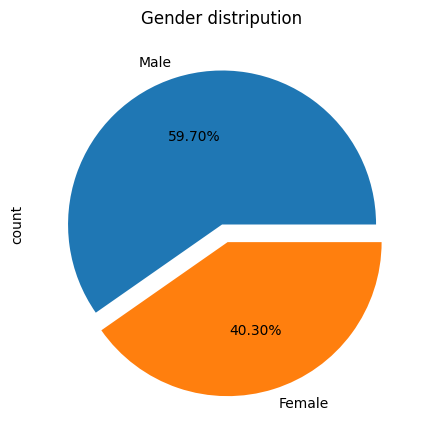

In [23]:
# the percentage of different genders
y = employee_data['Gender']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Gender distripution');

<Axes: xlabel='Age', ylabel='Count'>

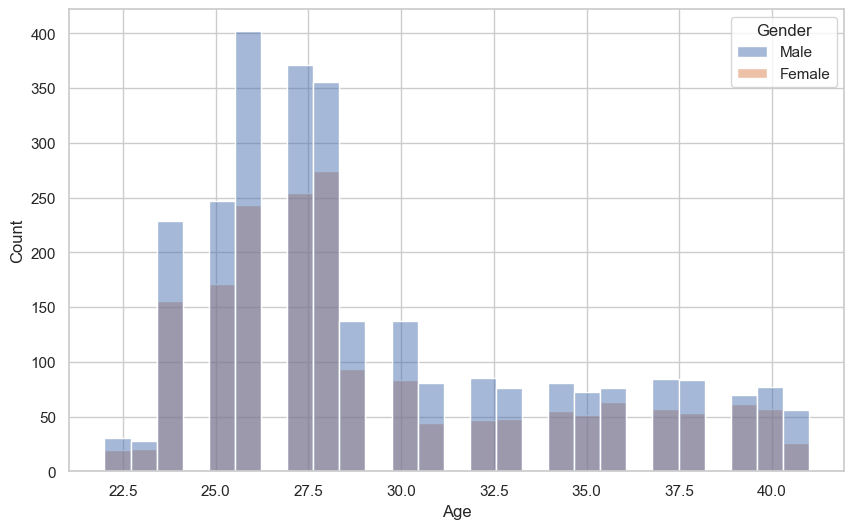

In [24]:
# age distribution
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(data=employee_data,x="Age",hue="Gender")

In [26]:
male_data=employee_data[employee_data["Gender"]=='Male']
female_data=employee_data[employee_data["Gender"]=='Female'] 

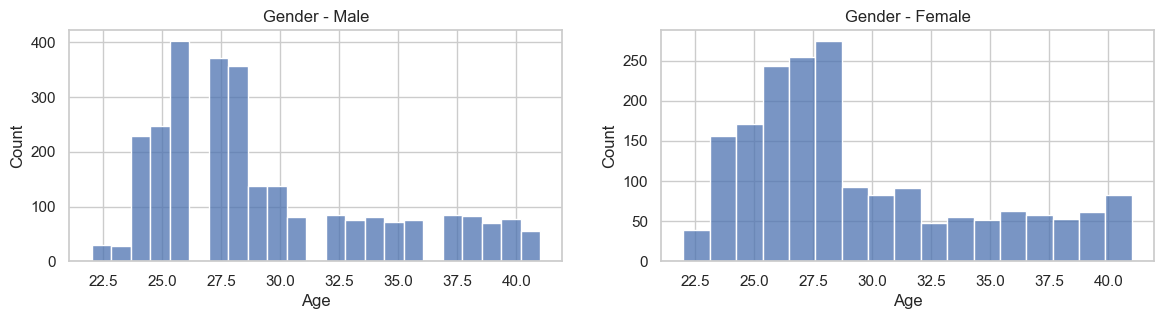

In [27]:
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="Age",ax=ax1,)
sns.histplot(data=female_data,x="Age",ax=ax2)
ax2.title.set_text('Gender - Female')

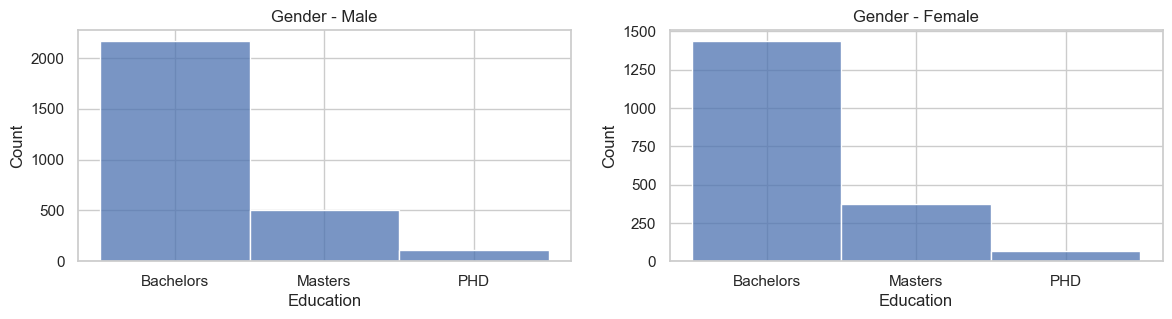

In [28]:
#Gender and education
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="Education",ax=ax1,)
sns.histplot(data=female_data,x="Education",ax=ax2)
ax2.title.set_text('Gender - Female')

In [36]:
#counting how many are male and female
employee_data['Gender'].value_counts()

Gender
Male      2778
Female    1875
Name: count, dtype: int64

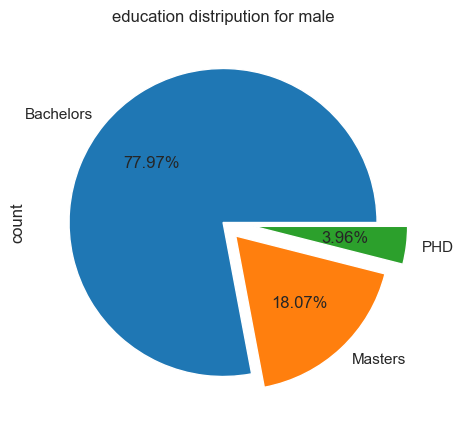

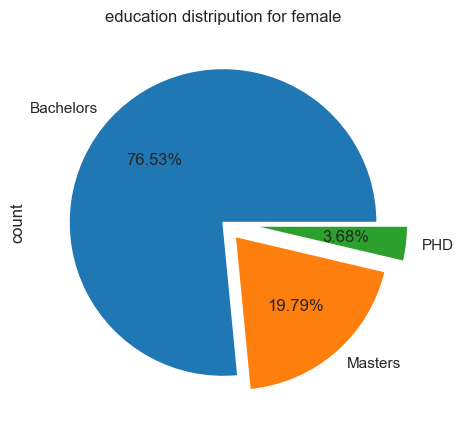

In [35]:
y = male_data['Education']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12, 0.2], title='education distripution for male');

y = female_data['Education']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12, 0.2], title='education distripution for female');

<Axes: xlabel='LeaveOrNot', ylabel='Count'>

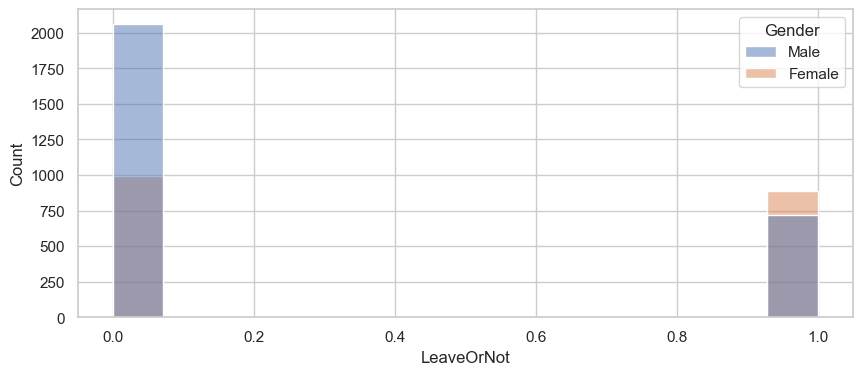

In [38]:
# leave or not distripution by gender
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(10,4))
sns.histplot(data=employee_data,x="LeaveOrNot",hue="Gender")

It looks like female employees more intend to leave this company over male employees

### **Label Encoding for Categorical Columns**

In [40]:
employee_data2 = employee_data
le=LabelEncoder()
employee_data2["Education"]= le.fit_transform(employee_data2["Education"])
employee_data2["City"]=le.fit_transform(employee_data2["City"])
employee_data2["Gender"]=le.fit_transform(employee_data2["Gender"])
employee_data2["EverBenched"]=le.fit_transform(employee_data2["EverBenched"])

In [41]:
employee_data2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


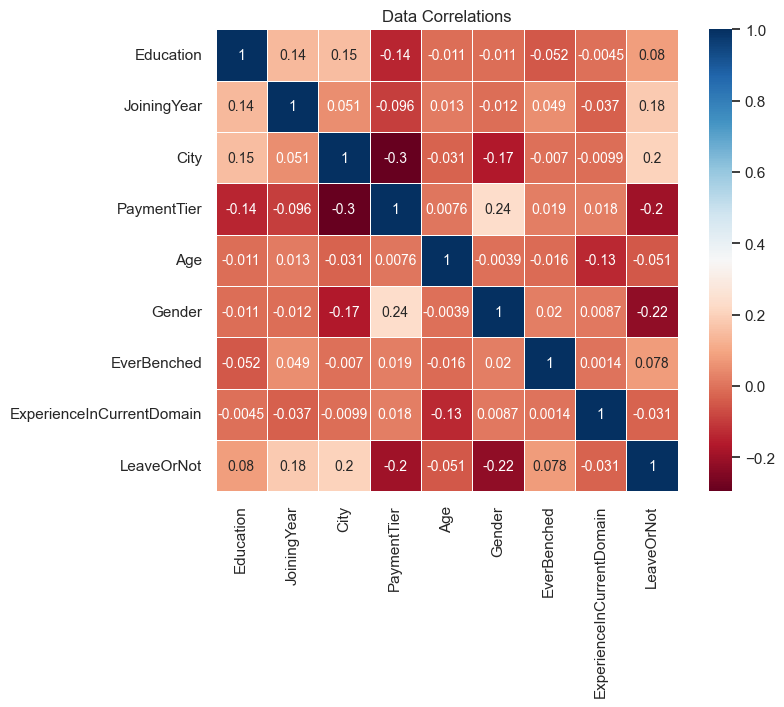

In [42]:
# Data Correlation heat map
plt.figure(figsize=(8, 6)) 
colormap = plt.cm.RdBu
heatmap_data = employee_data2
plt.title("Data Correlations")
sns.heatmap(data=heatmap_data.astype(float).corr(), cmap=colormap, linewidths=0.5, vmax=1.0, square=True, annot=True, annot_kws={"size": 10})

plt.show()
del heatmap_data

From this heat map, we can see there is some correlation between the city and leaveOrNot feature.
There is a noticiable correlation between gender and payment

#### **Investigating what is the relationship between genders and payment tier**

<Axes: xlabel='PaymentTier', ylabel='Count'>

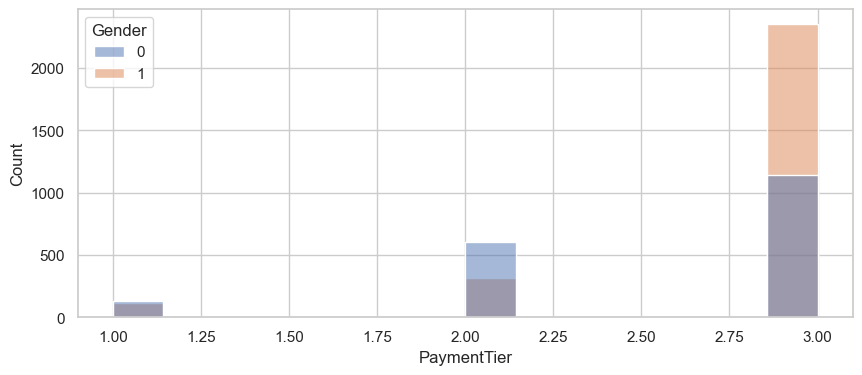

In [43]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(10,4))
sns.histplot(data=employee_data,x="PaymentTier",hue="Gender")

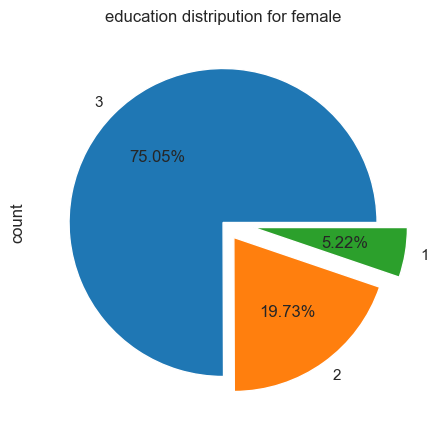

In [44]:
y = employee_data['PaymentTier']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12, 0.2], title='education distripution for female');

More female in tier 3 than male

<Axes: xlabel='Age', ylabel='Count'>

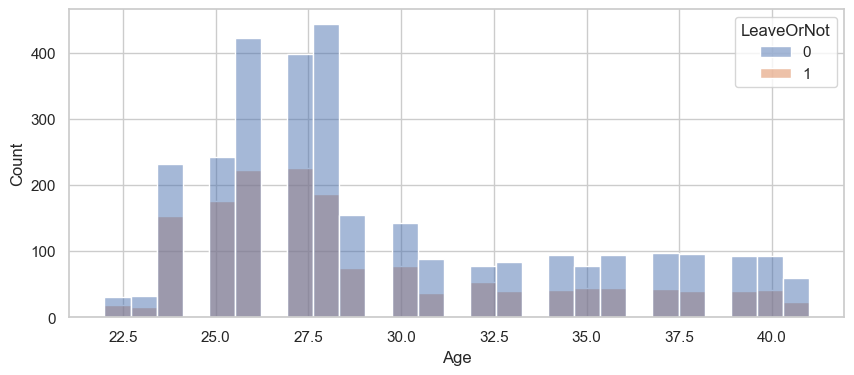

In [46]:
# leave or not distripution
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(10,4))
sns.histplot(data=employee_data,x="Age",hue="LeaveOrNot")

More younger employees leaving than older employees.

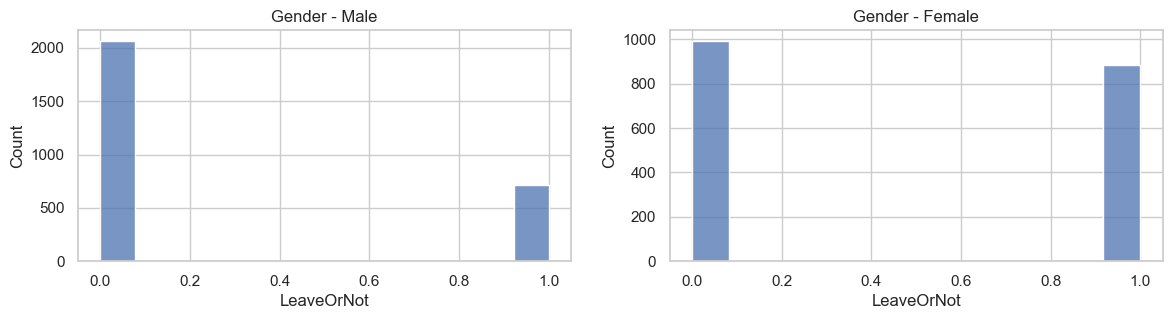

In [47]:
#Trying to find a correlation between gender, age and leaving or not leaving
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="LeaveOrNot",ax=ax1,)
sns.histplot(data=female_data,x="LeaveOrNot",ax=ax2)
ax2.title.set_text('Gender - Female')

C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


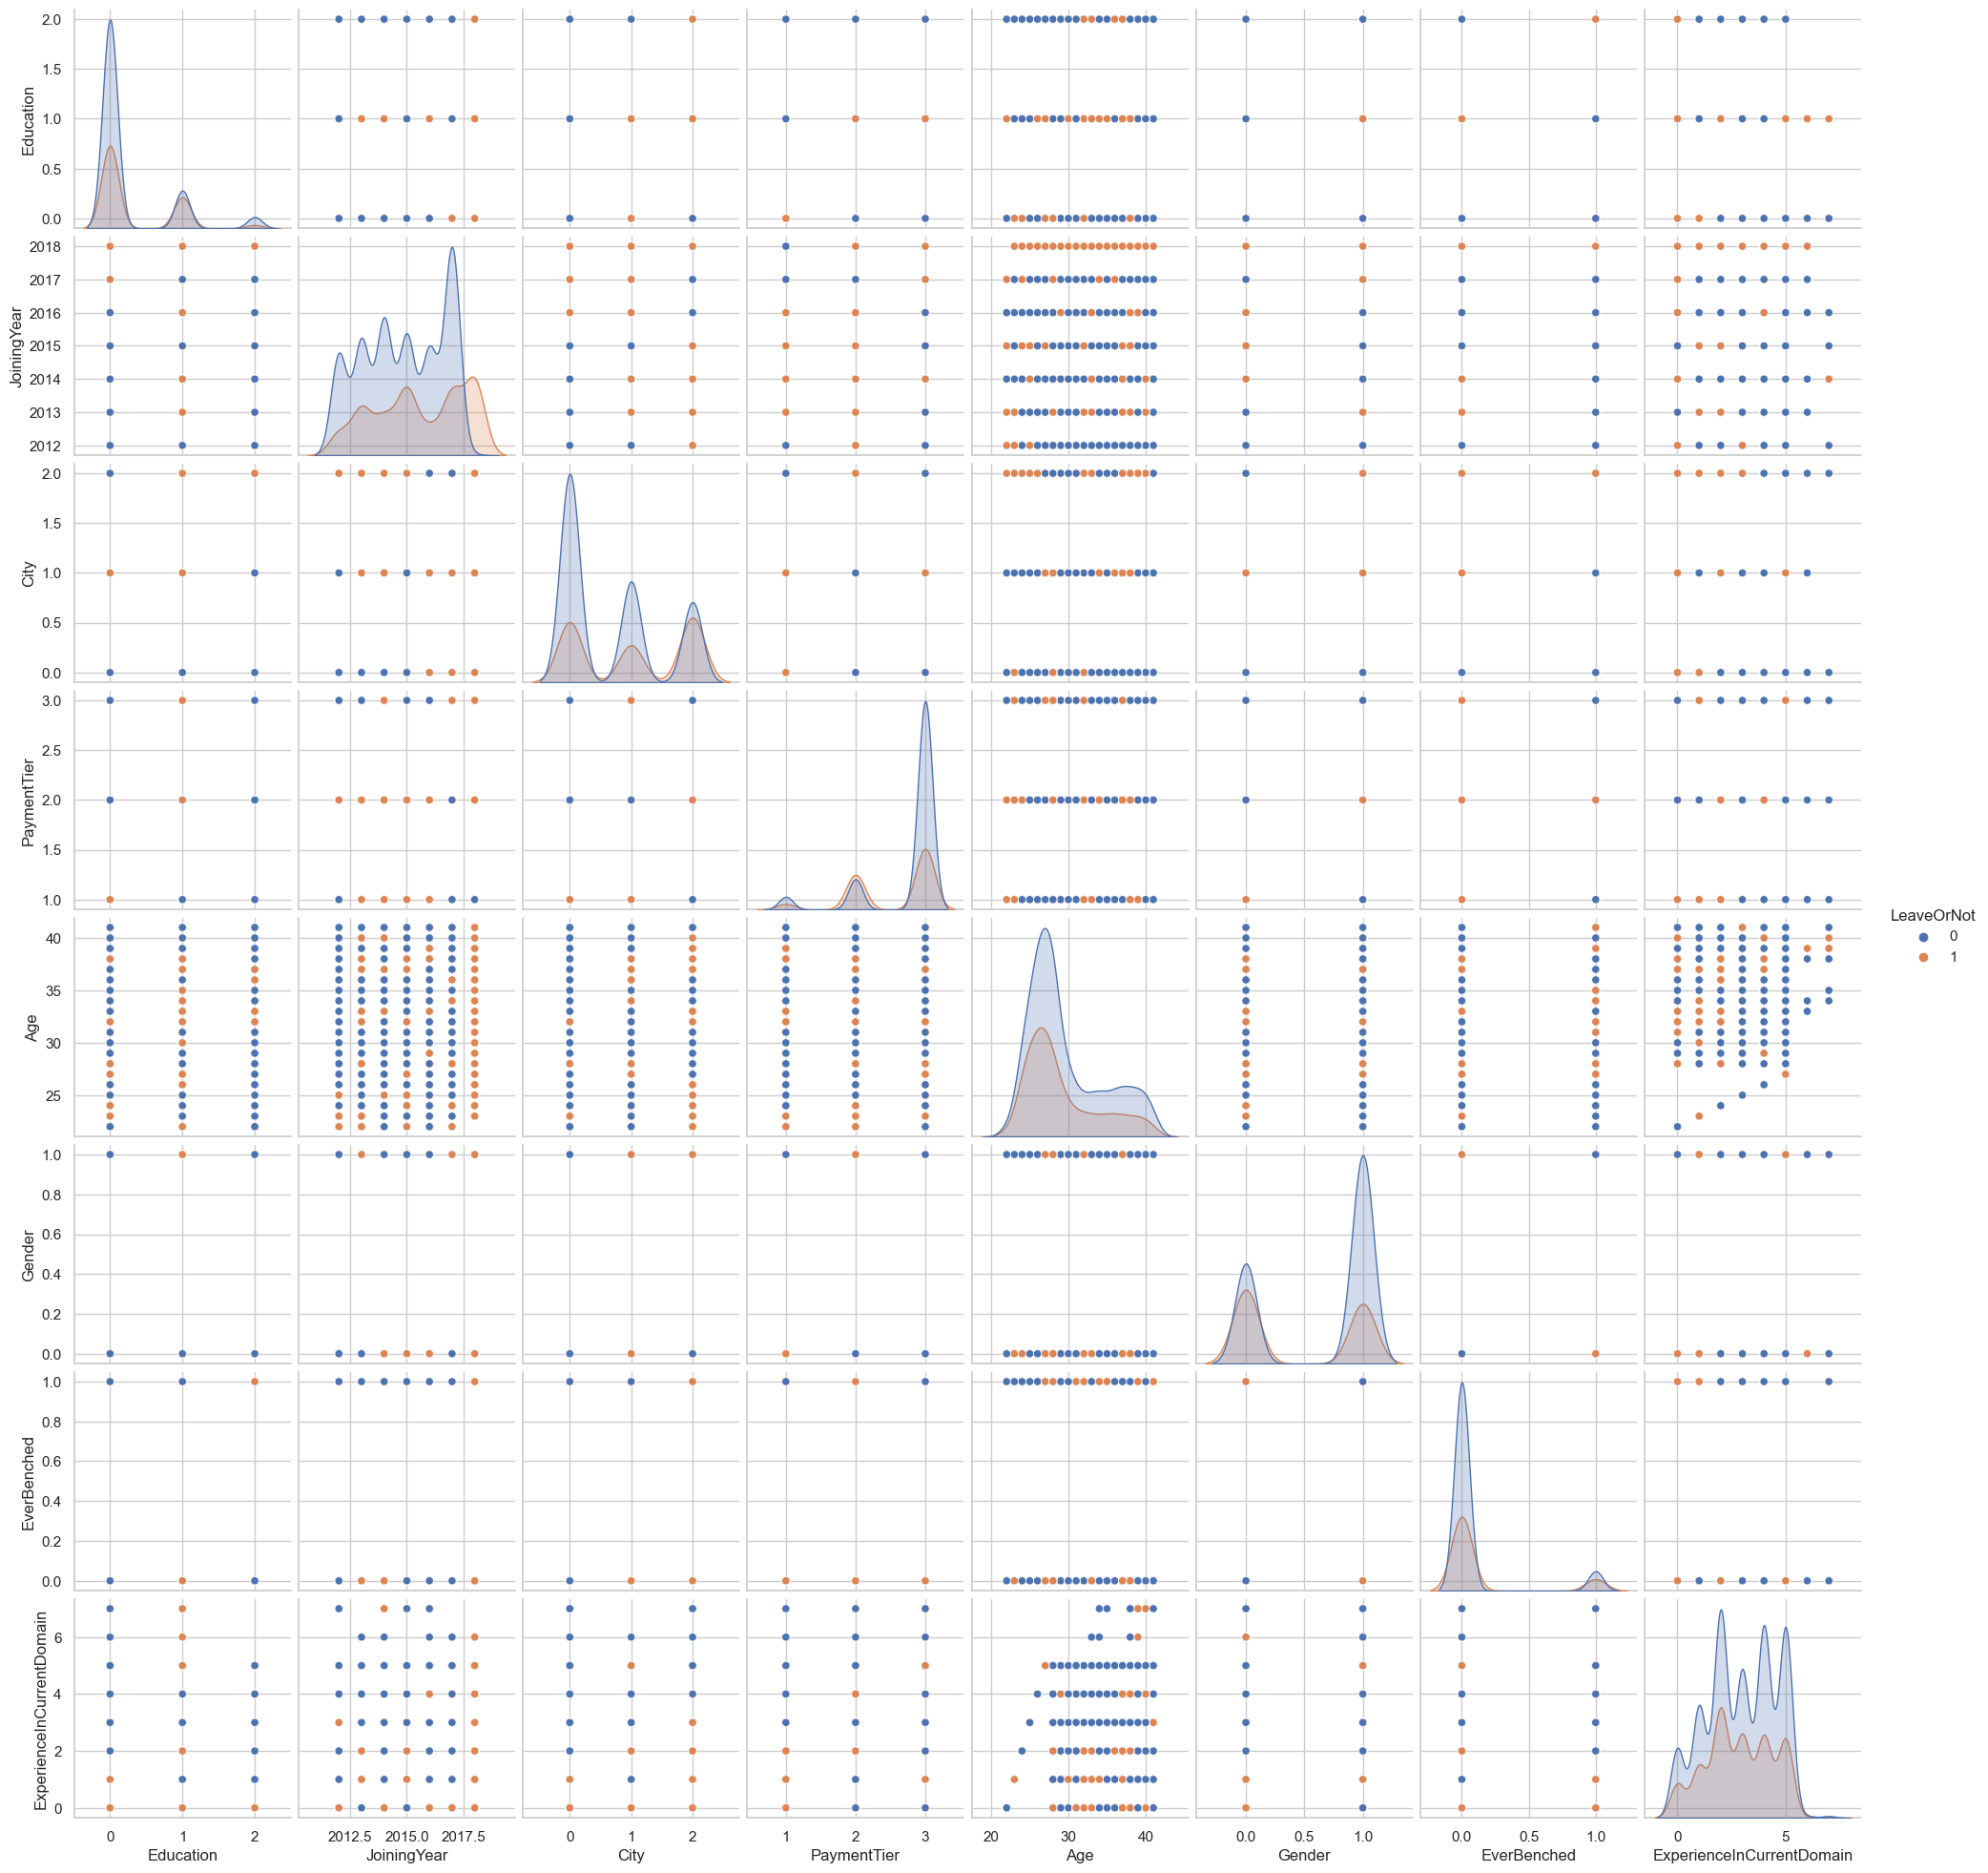

In [52]:
sns.pairplot(data= employee_data, hue= "LeaveOrNot")